In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import math 
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
pd.options.display.max_columns = None

In [17]:
df = pd.read_csv("attacks_limpieza_2.csv", index_col = 0)
df.sample(5)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,fatal_(y/n),injury,date,age_new
5348,1924.01.29,1924,Unprovoked,south africa,KwaZulu-Natal,"South Beach, Durban",Swimming,Johannes Karl Schultz,M,22,15h15,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,FATAL,29-Jan-1924,22.0
3495,1972.04.16,1972,Unprovoked,western samoa,Upolu Island,Nuulua,Swimming,"Alan Banner, Peace Corps volunteer",M,25,NaN,Thought to involve a tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,FATAL,16-Apr-1972,25.0
678,2014.08.27.c,2014,Unprovoked,spain,Alicante,Benidorm,Swimming,Raquel Martin,F,30s,NaN,small shark,http://sharkattackfile.net/spreadsheets/pdf_di...,N,Minor lacerations to posterior lower leg,27-Aug-2014,30.0
814,2013.07.29.b,2013,Unprovoked,mexico,Quintana Roo,NaN,Wading,Bonnie Davis,F,NaN,11h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,N,Hip bitten,29-Jul-2013,NaN
5362,1923.05.23.R,1923,Unprovoked,australia,Western Australia,"Southgates, near Geraldton",Wading,Percy Evensen,M,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,N,Minor puncture wounds to foot,Reported 23-May-1923,NaN


In [19]:
df['age_new'].unique()

array([nan, 14., 19., 20., 15., 21., 27., 36., 25.,  6., 16., 50., 13.,
       57., 11., 48., 18., 52., 12., 32., 10., 34., 30., 60., 33., 29.,
       54., 41., 37., 56., 69., 38., 55., 35., 46., 45., 40., 28., 24.,
       26., 49., 22.,  7., 31., 17., 42.,  3.,  8., 82., 73., 68., 51.,
       39., 58., 47., 61., 65., 66., 43.,  9., 72., 59., 64., 23., 71.,
       44., 62., 63., 70., 53., 77., 74.,  5., 86., 84., 75., 87., 67.,
        1.,  2., 81., 78.])

### Ejercicio 1:
Podríais explicar en pocas palabras ¿Qué es lo que hace exactamente el método boxcox de normalización de datos?

<font color ='orange'>Un boxcox es un tipo de transformación para corregir sesgos en la distribución de errores, varianzas desiguales y mejorar la correlación entre las variables.

### Ejercicio 2:
Normalizad los datos de la columna age. Utilizad los métodos aprendidos y explicad las diferencias entre cada uno de ellos. Para cada transformación que hagáis cread una columna nueva.

<font color ='orange'> Manualmente:

In [20]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,year,age_new
0,1800,NaN
1,1797,NaN
2,1792,NaN
3,1791,NaN
4,1788,NaN


In [21]:
media = numericas["age_new"].mean()
maximo = numericas["age_new"].max() 
minimo = numericas["age_new"].min()

In [ ]:
numericas["age_NORM"] = (numericas["age_new"] - media) / (maximo - minimo )

In [25]:
numericas.sample(5)

,year,age_new,age_NORM
2268,1999,28.0,0.008515
3017,1985,39.0,0.136422
459,2016,34.0,0.078283
2487,1996,NaN,NaN
2818,1989,31.0,0.043399


/home/adalaber/Descargas/yes/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/adalaber/Descargas/yes/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


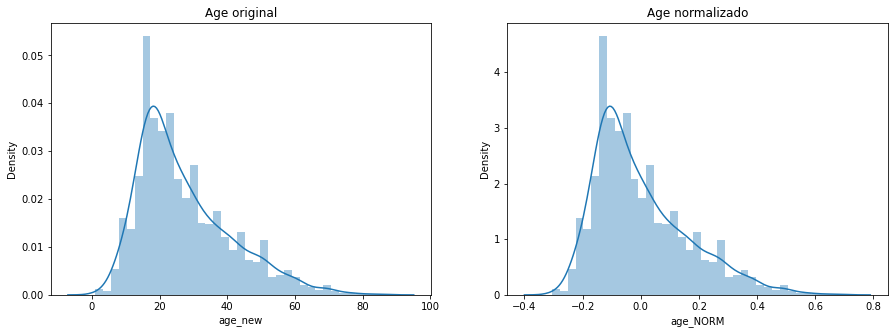

In [26]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Age original')
axes[1].set_title('Age normalizado')

sns.distplot(numericas['age_new'] ,ax = axes[0])
sns.distplot(numericas['age_NORM'], ax = axes[1]);

<font color ='orange'> Logarítmica:

In [27]:
numericas['age_NORM_log'] = numericas['age_new'].apply(lambda x: np.log(x) if x != 0 else 0)

/tmp/ipykernel_5760/2153539485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericas['age_NORM_log'] = numericas['age_new'].apply(lambda x: np.log(x) if x != 0 else 0)


In [28]:
numericas.sample(5)

,year,age_new,age_NORM,age_NORM_log
1140,2010,NaN,NaN,NaN
164,0,NaN,NaN,NaN
5898,1887,NaN,NaN,NaN
3124,1982,20.0,-0.084508,2.995732
2212,2000,17.0,-0.119392,2.833213


/home/adalaber/Descargas/yes/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/adalaber/Descargas/yes/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


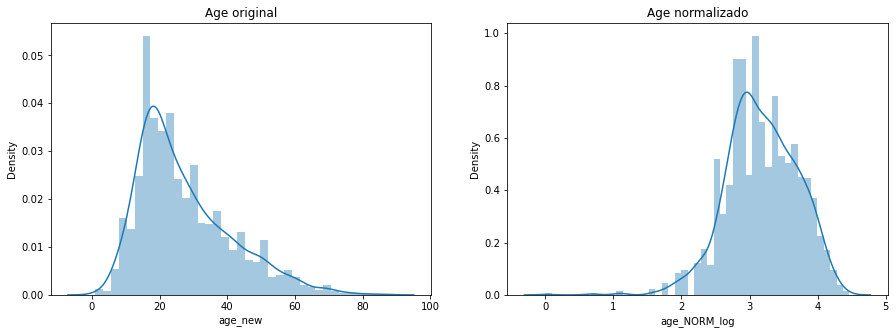

In [29]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Age original')
axes[1].set_title('Age normalizado')

sns.distplot(numericas['age_new'] ,ax = axes[0])
sns.distplot(numericas['age_NORM_log'], ax = axes[1]);

<font color ='orange'> Raíz cuadrada:

In [32]:
numericas['age_NORM_raiz'] = numericas['age_new'].apply(lambda x: math.sqrt(x))

/tmp/ipykernel_5760/551357159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericas['age_NORM_raiz'] = numericas['age_new'].apply(lambda x: math.sqrt(x));


In [34]:
numericas.sample(5)

,year,age_new,age_NORM,age_NORM_log,age_NORM_raiz
2377,1997,42.0,0.171306,3.737670,6.480741
298,2017,14.0,-0.154275,2.639057,3.741657
3791,1965,17.0,-0.119392,2.833213,4.123106
4871,1942,NaN,NaN,NaN,NaN
1171,2010,37.0,0.113166,3.610918,6.082763


/home/adalaber/Descargas/yes/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/adalaber/Descargas/yes/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


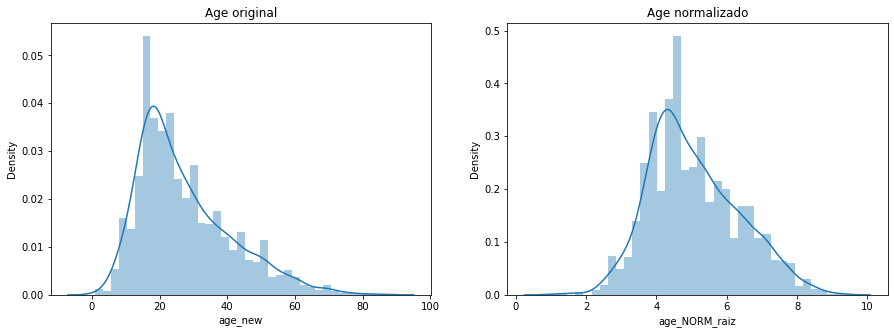

In [35]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Age original')
axes[1].set_title('Age normalizado')

sns.distplot(numericas['age_new'] ,ax = axes[0])
sns.distplot(numericas['age_NORM_raiz'], ax = axes[1]);

<font color ='orange'> Stats boxcox:

In [37]:
numericas['age_NORM_boxcox'], lambda_ajustada = stats.boxcox(numericas['age_new'])

/tmp/ipykernel_5760/3567627452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericas['age_NORM_boxcox'], lambda_ajustada = stats.boxcox(numericas['age_new'])


In [38]:
lambda_ajustada

8.472135811722177

In [39]:
numericas.sample(5)

,year,age_new,age_NORM,age_NORM_log,age_NORM_raiz,age_NORM_boxcox
3315,1977,24.0,-0.037996,3.178054,4.898979,5.825647e+10
1488,2007,48.0,0.241073,3.871201,6.928203,2.068765e+13
6179,1851,NaN,NaN,NaN,NaN,NaN
3443,1974,NaN,NaN,NaN,NaN,NaN
4442,1955,25.0,-0.026368,3.218876,5.000000,8.232746e+10


/home/adalaber/Descargas/yes/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/adalaber/Descargas/yes/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


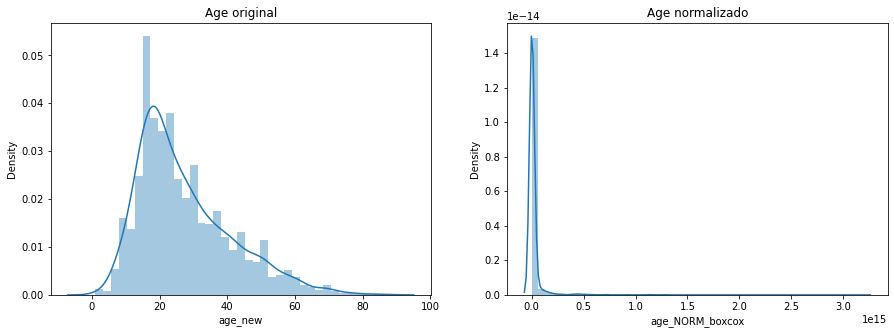

In [40]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Age original')
axes[1].set_title('Age normalizado')

sns.distplot(numericas['age_new'] ,ax = axes[0])
sns.distplot(numericas['age_NORM_boxcox'], ax = axes[1]);

<font color ='orange'>Sklearn MinMaxScaller

In [42]:
minmax = MinMaxScaler()

In [43]:
minmax.fit(numericas)

MinMaxScaler()

In [44]:
X_normalizadas = minmax.transform(numericas)

In [45]:
X_normalizadas.min(axis=0)

array([ 0., nan, nan, nan, nan, nan])

In [46]:
X_normalizadas.max(axis=0)

array([ 1., nan, nan, nan, nan, nan])

In [48]:
numericas_minmax = pd.DataFrame(X_normalizadas, columns = numericas.columns)
numericas_minmax.sample(5)

,year,age_new,age_NORM,age_NORM_log,age_NORM_raiz,age_NORM_boxcox
5568,0.947473,NaN,NaN,NaN,NaN,NaN
1338,0.995540,0.267442,0.267442,0.711625,0.468212,0.000018
61,0.000000,NaN,NaN,NaN,NaN,NaN
3265,0.980674,0.232558,0.232558,0.681725,0.430216,0.000006
24,0.861249,NaN,NaN,NaN,NaN,NaN


### Ejercicio 3: 
Guardar en un csv nuevo.

In [49]:
df.to_csv('attacks_limpieza_7.csv')